In [ ]:
import numpy as np
from optiland import analysis, optic
from optiland.physical_apertures.rectangular import RectangularAperture
from optiland.analysis.irradiance import IncoherentIrradiance
from optiland.analysis.intensity import RadiantIntensity
import optiland.backend as be

In [ ]:
lens = optic.Optic(name="carta")

lens.set_field_type("angle")
lens.add_field(y=0)

lens.set_aperture(aperture_type="EPD", value=80)

lens.add_wavelength(value=0.587, is_primary=True)
val = 30
bar=RectangularAperture(
    y_max=val,
    y_min=-val,
    x_max=val,
    x_min=-val,
)
#lens.add_surface(index=0, radius=np.inf, thickness=np.inf)
lens.add_surface(index=0, z=np.inf, y=10, aperture=bar)
lens.add_surface(index=1, z=-100, aperture=bar)
lens.add_surface(index=2, z=100, radius_y=100,radius_x=np.inf, material="mirror", rx=np.radians(-30), surface_type="toroidal", is_stop=True)

carta_aperture = RectangularAperture(
    y_max=600,
    y_min=-600,
    x_max=50,
    x_min=-50,
)
lens.add_surface(index=3, z=-100, y=-650, aperture=carta_aperture)
#lens.surface_group.surfaces[1].aperture = aperture
#lens.surface_group.surfaces[2].aperture = carta_aperture


(<Figure size 1000x400 with 1 Axes>, <Axes: xlabel='Z [mm]', ylabel='Y [mm]'>)

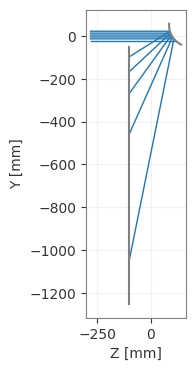

In [ ]:
lens.draw(num_rays=10)

In [ ]:
lens.draw3D()

1
1280


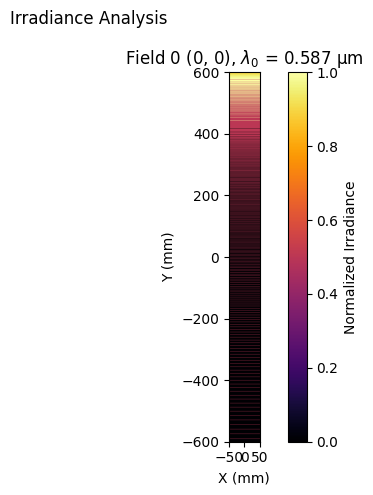

In [ ]:
irradiance = IncoherentIrradiance(
    lens,
    #num_rays=1000_000,  # 1 million rays
    num_rays=1000,
    detector_surface=-1,  # image surface
    distribution="uniform",
    res=[1,1280]
)
irradiance.view(normalize=True)
irr_data = irradiance.data
print(irradiance.npix_x)
print(irradiance.npix_y)

In [ ]:
i = 0
for fblock in irr_data:
    for irr, *_ in fblock:
        irr_mean=be.mean(irr)
        irr_std=be.std(irr)
        irr_max=be.max(irr)
        irr_min=be.min(irr)

        if irr_mean > 0:
            rms_uniformity = irr_std / irr_mean
        else:
            rms_uniformity = 0

        if irr_mean > 0:
            irr_uniformity = (irr_max - irr_min) / irr_mean
        else:
            irr_uniformity = 0

print(irr_mean)
print(irr_uniformity)
print(rms_uniformity)
print(irr_max)
print(irr_min)

3.4589
4.625748070195727
1.4292918677664337
16.0
0.0
